### This notebook evaluates and interpret the best TPOT pipeline

##### *Note - we decided to add as features Longitude and Lattitude, as we believe those are important and improve model accuracy*

In [1]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.linear_model import ElasticNetCV
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

In [2]:
# Load prepared data
df = pd.read_csv('../data/df_prepped.csv')
df.head()

,Year,Countries,lat,lon,Sand_1,Sand_2,Sand_3,Sand_4,Sand_5,Sand_6,...,maize_lag-2,pcp_mean_lag-2,tmax_mean_lag-2,tmin_mean_lag-2,spi_mean_lag-2,maize_lag-3,pcp_mean_lag-3,tmax_mean_lag-3,tmin_mean_lag-3,spi_mean_lag-3
0,2007,Angola,-8.75,14.75,50,51,51,48,45,46,...,0.721607,129.051864,301.518536,292.496579,1.644698,0.620005,109.983325,301.786056,292.204097,0.514275
1,2007,Angola,-16.25,14.25,62,64,63,59,58,59,...,0.300217,47.697564,303.988747,288.916992,0.909295,0.212699,41.130026,303.298082,288.642853,0.588172
2,2007,Angola,-17.25,14.25,69,71,70,67,65,65,...,4.044452,42.130629,305.494178,290.535403,0.952237,2.295351,35.049776,304.824778,290.284886,0.371446
3,2007,Angola,-11.75,14.75,60,63,61,57,53,53,...,0.907431,159.454723,299.404975,287.724299,1.374616,0.783018,174.088260,298.908208,287.362407,0.643207
4,2007,Angola,-14.25,13.75,67,69,68,63,61,61,...,0.675967,66.698670,304.644632,290.635254,1.144088,0.605584,67.404588,303.930955,290.564185,0.553079


In [3]:
# Drop Countries and Farm
df_label = df.loc[:,['Countries','Farm']]
df = df.drop(['Countries','Farm'], axis=1)

In [4]:
# Separate a test set, the year 2016
df_test = df[df.Year == 2016].sort_values('Year')
df_train = df[df.Year != 2016]

print('The training set has years: ', list(df_train.Year.unique()))
print('The test set has years: ', list(df_test.Year.unique()))

The training set has years:  [2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015]
The test set has years:  [2016]


In [5]:
SEED=1

In [6]:
# Shuffle
train = df_train.sample(frac=1, random_state=SEED)
test = df_test.sample(frac=1, random_state=SEED)

# X and y
X_train = train.drop(columns=['Y_maize_major','Year'], axis=1)
y_train = train['Y_maize_major']
X_test = test.drop(columns=['Y_maize_major','Year'], axis=1)
y_test = test['Y_maize_major']

In [7]:
# TPOT best model pipeline
exported_pipeline = make_pipeline(
    PCA(iterated_power=7, svd_solver="randomized"),
    ElasticNetCV(l1_ratio=0.75, tol=0.01)
)

In [10]:
exported_pipeline.fit(X_train, y_train)

Pipeline(steps=[('pca', PCA(iterated_power=7, svd_solver='randomized')),
                ('elasticnetcv', ElasticNetCV(l1_ratio=0.75, tol=0.01))])

In [11]:
y_preds = exported_pipeline.predict(X_test)

In [12]:
# Calculate and print metrics
rmse = mean_squared_error(y_test, y_preds, squared=False)
mae = mean_absolute_error(y_test, y_preds)
print('Performance on test set (year 2016)')
print('RMSE:',round(rmse,4))
print('MAE:',round(mae,4))

Performance on test set (year 2016)
RMSE: 0.2818
MAE: 0.1856


In [13]:
exported_pipeline.steps

[('pca', PCA(iterated_power=7, svd_solver='randomized')),
 ('elasticnetcv', ElasticNetCV(l1_ratio=0.75, tol=0.01))]

In [14]:
pd.DataFrame(exported_pipeline.steps[0][1].components_.T, index=X_train.columns)

,0,1,2,3,4,5,6,7,8,9,...,38,39,40,41,42,43,44,45,46,47
lat,0.019953,-0.177549,0.104907,-0.524704,0.396872,0.378320,-0.019130,-0.554216,0.040754,-0.257122,...,0.000190,0.000113,-9.545561e-05,-1.080411e-04,-0.000028,6.778289e-05,-0.000029,-3.746908e-05,9.487008e-06,-0.000006
lon,-0.011610,-0.080201,-0.079560,0.418862,-0.303419,0.814044,-0.199738,-0.042427,-0.078441,-0.008159,...,0.000062,0.000119,-1.173941e-04,-4.011201e-05,0.000033,-1.809307e-05,0.000030,-2.010860e-05,-7.122601e-06,0.000014
Sand_1,-0.039578,0.322753,-0.002643,0.014301,-0.005906,-0.054677,-0.210005,-0.159203,-0.175424,0.013108,...,-0.000281,0.000401,1.828016e-04,1.887582e-04,-0.000078,1.772381e-04,-0.000453,4.885222e-04,9.235569e-06,-0.000050
Sand_2,-0.038421,0.332759,-0.003339,0.015891,-0.006244,-0.066702,-0.245203,-0.169436,-0.212362,0.008184,...,0.000899,0.000958,-6.232013e-04,-3.365926e-04,0.000012,-3.626056e-05,-0.000043,-8.175983e-04,-3.815175e-04,0.000138
Sand_3,-0.037966,0.332482,-0.003747,0.019501,-0.009585,-0.056315,-0.220495,-0.159982,-0.180440,-0.000020,...,0.000977,0.000458,3.831519e-04,-1.414975e-04,-0.000093,-2.369320e-04,0.000706,1.910194e-04,7.333883e-04,-0.000084
Sand_4,-0.035283,0.320041,0.003554,-0.011110,0.009730,-0.004935,-0.158091,-0.104971,0.089674,-0.006339,...,0.000127,-0.000632,5.852587e-06,-5.177981e-04,-0.000095,-4.597995e-05,0.000519,3.144637e-04,-1.036930e-04,-0.000091
Sand_5,-0.036531,0.309228,0.003595,-0.002990,0.001526,0.041068,-0.087269,-0.057231,0.289886,0.036689,...,-0.000240,-0.001905,-4.009449e-04,2.203998e-04,-0.000087,-1.502186e-04,-0.000332,-7.680762e-05,-8.068011e-05,0.000252
Sand_6,-0.036683,0.304744,0.004906,-0.007082,0.004098,0.050953,-0.076808,-0.051746,0.335254,0.050578,...,0.000996,0.001479,6.446032e-04,3.286099e-04,0.000316,-1.086431e-04,-0.000454,1.405567e-04,-1.509298e-04,-0.000048
Sand_7,-0.037459,0.294996,0.007604,-0.019058,0.012252,0.044296,-0.059009,-0.042250,0.365733,0.070687,...,-0.000915,-0.000417,-2.313909e-04,7.867157e-05,-0.000063,5.588712e-04,0.000055,-1.370048e-04,1.186490e-04,-0.000106
Clay_1,0.027632,-0.184607,-0.014691,0.054578,-0.042354,-0.071113,-0.200577,-0.047106,0.367555,0.034797,...,0.001680,-0.001087,-2.524862e-04,-3.764794e-04,0.000158,1.763604e-04,0.000324,4.806937e-05,2.235032e-04,0.000261


In [15]:
n_pcs= exported_pipeline.steps[0][1].components_.shape[0]
most_important = [np.abs(exported_pipeline.steps[0][1].components_[i]).argmax() for i in range(n_pcs)]
most_important_names = [X_train.columns[most_important[i]] for i in range(n_pcs)]

In [16]:
dic = {'PC{}'.format(i+1): most_important_names[i] for i in range(n_pcs)}
df = pd.DataFrame(sorted(dic.items()))

In [17]:
df

,0,1
0,PC1,pcp_mean_lag-2
1,PC10,Harvest_Maize_month_int
2,PC11,maize_lag-1
3,PC12,Sow_Maize_month_int
4,PC13,Sow_Maize_month_int
5,PC14,sow_to_harvest_months
6,PC15,Sand_4
7,PC16,Sand_7
8,PC17,spi_mean_lag-1
9,PC18,Clay_1


In [18]:
# Model coefficients
coeffs = exported_pipeline.steps[1][1].coef_

17 features, reduction of 64.58%


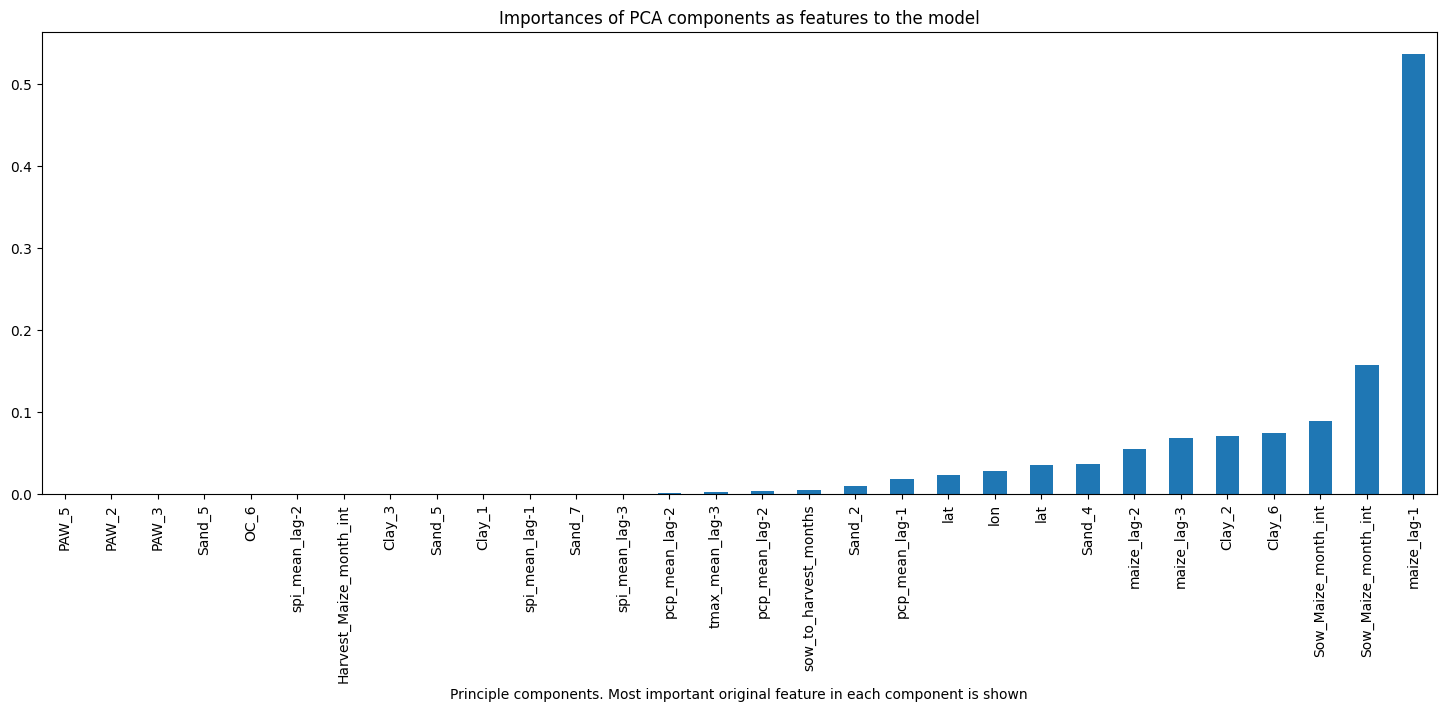

In [19]:
component_importances = pd.Series(index = dic.values(), data = np.abs(coeffs))

n_selected_features = (component_importances>0).sum()
print('{0:d} features, reduction of {1:2.2f}%'.format(
    n_selected_features,(1-n_selected_features/len(component_importances))*100))

component_importances.sort_values().tail(30).plot(kind = 'bar', figsize = (18,6))
plt.xlabel('Principle components. Most important original feature in each component is shown')
plt.title('Importances of PCA components as features to the model')
plt.show()

However, as each component has information from more than one original feature, interpretation is not as simple. Therefore, we use simpler models for explainability (see interpretation.ipynb)